# PyTorch Tutorial - Part 2

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates
* Get accustomed to the basics of pytorch 
* Do simple operations

In [96]:
import torch
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from IPython import display

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("We are using the following device for learning:",device)

We are using the following device for learning: cpu


Generate data coming from a simple polynomial and corrupt with noise

In [103]:
np.random.seed(0)

x = np.arange(-2, 5, 0.1)
y = x**3 - 4*x**2 - 2*x + 2
y_noise = y + np.random.normal(0, 1.5, size=(len(x),))

In [104]:
# simple function to get a random mini-batch
def get_batch(x, y, batch_size=20):
    idxs = np.random.randint(0, len(x), (batch_size))
    return x[idxs], y[idxs]

Define graph by model, use 2 hidden layers, one with ReLU and the other one with tanh activation (overkill for this example, but for illustration purposes).

In [105]:
num_iter = 100*300
image_cycle = 300

mini_batch_size = 10

neurons_H1 = 4
neurons_H2 = 5

      
# contains all the x values. We need to expand the dimensions of the input tensor    
x_eval_tensor = torch.from_numpy(np.expand_dims(x,1)).float().to(device)
    
# predefined linear layers, parameters are input and output neurons
layer1 = torch.nn.Linear(1, neurons_H1).to(device)
layer2 = torch.nn.Linear(neurons_H1, neurons_H2).to(device) 
layer3 = torch.nn.Linear(neurons_H2, 1, bias=False).to(device) # do not use bias on final layer

# Activation function
activation_function = torch.nn.Tanh()


# gather parameters of both layers
parameters = list(layer1.parameters()) + list(layer2.parameters()) + list(layer3.parameters())

# Adam and MSE Loss
optimizer = torch.optim.Adam(parameters)
loss_fn = torch.nn.MSELoss(reduction='mean')

Main loop of learning. Calculate output of a batch, compute loss and respective gradients, the do the optimization. Import is to reset the gradients after each step.

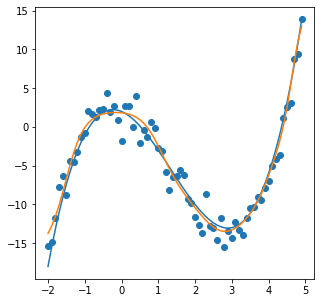

In [106]:
fig,ax = plt.subplots(1,1,figsize=(5,5))        
plt.ion()
plt.show()
   
fig.show()
fig.canvas.draw()

# main loop    
for step in range(num_iter):    
    batch_x, batch_y = get_batch(x,y_noise, mini_batch_size)
    x_train_tensor = torch.from_numpy(np.expand_dims(batch_x,1)).float().to(device)
    y_train_tensor = torch.from_numpy(np.expand_dims(batch_y,1)).float().to(device)
    
    
    yhat = layer3(activation_function(layer2(activation_function(layer1(x_train_tensor)))))
    
    loss = loss_fn(yhat, y_train_tensor)
        
    # compute gradients
    loss.backward() 
        
    # carry out one optimization step with Adam
    optimizer.step()
        
    # reset gradients to zero
    optimizer.zero_grad()

    # plot result of learning
    if step % image_cycle == 0:
        y_est = layer3(activation_function(layer2(activation_function(layer1(x_eval_tensor)))))

        ax.clear()
        ax.scatter(x, y_noise)
        ax.plot(x, y)
        ax.plot(x, y_est.detach().cpu().numpy())
        fig.canvas.draw()
